# Python-Based Cyber Threat Data Analysis and Prediction

Project Title: Development of Interactive Cyber Threat Visualization Dashboard  

This notebook demonstrates Python-based data analysis and machine learning modeling on a synthetic cybersecurity dataset using AI-driven prompting.


## Prompt – Synthetic Cyber Threat Dataset Generation

"Generate a realistic synthetic cybersecurity dataset representing the last 10 years
with attacker IP, target IP, location, attack type, device, security mechanism,
severity, and attack outcome."


In [2]:
!pip install faker


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.0/2.0 MB 13.2 MB/s eta 0:00:00


In [3]:
import pandas as pd
import random
from faker import Faker

fake = Faker()

attack_types = ["Malware", "Phishing", "DDoS", "Ransomware", "SQL Injection", "Brute Force"]
attack_vectors = ["Email", "API", "USB", "Network"]
devices = ["Laptop", "Mobile", "Server", "Cloud VM", "Database"]
systems = ["Web Server", "Database Server", "Network Device", "User Account"]
security = ["Firewall", "IDS", "SIEM", "Antivirus"]
severity = ["Low", "Medium", "High", "Critical"]
status = ["Blocked", "Failed", "Successful"]
countries = ["India", "USA", "China", "UK", "Germany", "France", "Russia", "Brazil"]

data = []

for i in range(300):
    data.append({
        "incident_id": f"INC{i+1:04}",
        "timestamp": fake.date_time_between(start_date="-10y", end_date="now"),
        "attack_type": random.choice(attack_types),
        "attack_vector": random.choice(attack_vectors),
        "severity": random.choice(severity),
        "source_country": random.choice(countries),
        "target_country": random.choice(countries),
        "source_ip": fake.ipv4(),
        "destination_ip": fake.ipv4(),
        "device_affected": random.choice(devices),
        "operating_system": random.choice(["Windows", "Linux", "macOS", "Android"]),
        "target_system": random.choice(systems),
        "protocol": random.choice(["TCP", "UDP", "HTTP", "HTTPS"]),
        "port": random.choice([22, 80, 443, 3389]),
        "status": random.choice(status),
        "detected_by": random.choice(security),
        "impact_level": random.choice(["Low", "Medium", "High"]),
        "mitigation_action": random.choice(["Patch Applied", "IP Blocked", "Traffic Filtered"])
    })

df = pd.DataFrame(data)
df.head()


,incident_id,timestamp,attack_type,attack_vector,severity,source_country,target_country,source_ip,destination_ip,device_affected,operating_system,target_system,protocol,port,status,detected_by,impact_level,mitigation_action
0,INC0001,2018-10-08 17:01:17.736759,DDoS,Network,Critical,India,UK,2.125.78.55,93.116.141.55,Database,Linux,User Account,HTTP,3389,Blocked,Firewall,Low,Traffic Filtered
1,INC0002,2022-01-29 13:50:36.059245,Malware,API,High,Germany,Russia,118.153.223.24,94.61.20.91,Database,Linux,User Account,HTTP,3389,Successful,Antivirus,Low,Patch Applied
2,INC0003,2022-05-08 23:22:40.209278,Phishing,USB,Medium,France,Russia,75.145.24.19,32.220.13.29,Laptop,Linux,User Account,UDP,80,Successful,Antivirus,High,Patch Applied
3,INC0004,2022-07-26 22:43:19.180069,Ransomware,USB,Critical,UK,Russia,18.200.223.88,158.236.14.87,Database,macOS,Web Server,UDP,443,Failed,SIEM,High,Patch Applied
4,INC0005,2018-03-08 20:40:28.189014,SQL Injection,Email,Critical,France,Germany,22.182.56.196,91.170.59.79,Laptop,Android,Network Device,TCP,22,Blocked,Antivirus,Medium,Traffic Filtered


## Prompt – Python Environment Setup

"Set up a Python environment with required libraries for cybersecurity data analysis and machine learning."


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB


## Prompt – Dataset Overview

"Display structure, size, and data types of the cybersecurity dataset."


In [4]:
df.shape
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 300 entries, 0 to 299
Data columns (total 18 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   incident_id        300 non-null    object        
 1   timestamp          300 non-null    datetime64[ns]
 2   attack_type        300 non-null    object        
 3   attack_vector      300 non-null    object        
 4   severity           300 non-null    object        
 5   source_country     300 non-null    object        
 6   target_country     300 non-null    object        
 7   source_ip          300 non-null    object        
 8   destination_ip     300 non-null    object        
 9   device_affected    300 non-null    object        
 10  operating_system   300 non-null    object        
 11  target_system      300 non-null    object        
 12  protocol           300 non-null    object        
 13  port               300 non-null    int64         
 14  status    

## Prompt – Timestamp Processing

"Convert timestamp column into datetime format for time-based analysis."


In [5]:
df['timestamp'] = pd.to_datetime(df['timestamp'])
df['date'] = df['timestamp'].dt.date


## Prompt – Exploratory Data Analysis

"Analyze attack trends, severity, affected devices, geography, and outcomes using visualizations."


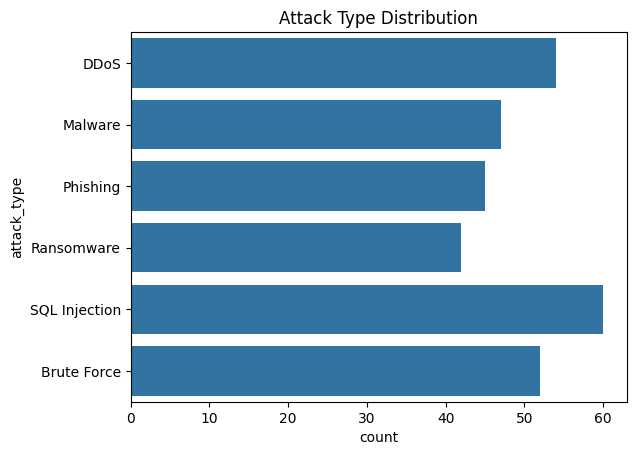

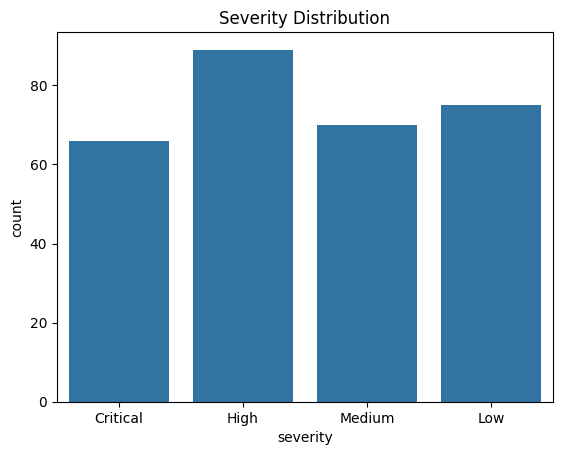

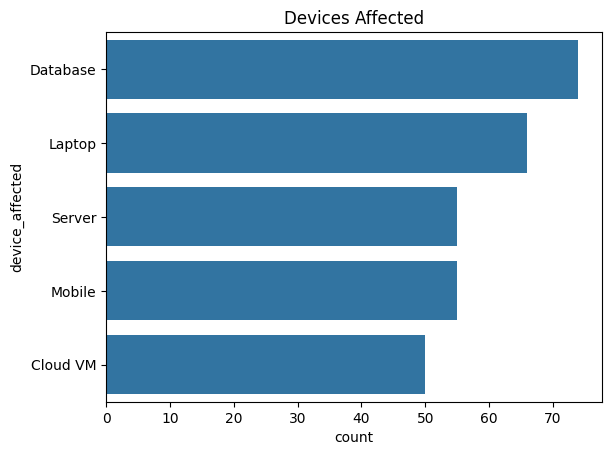

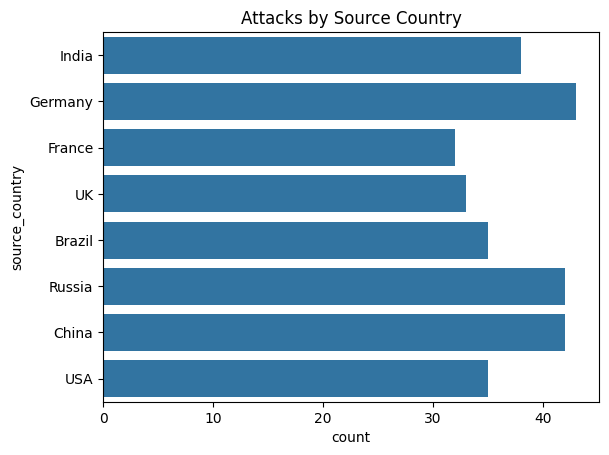

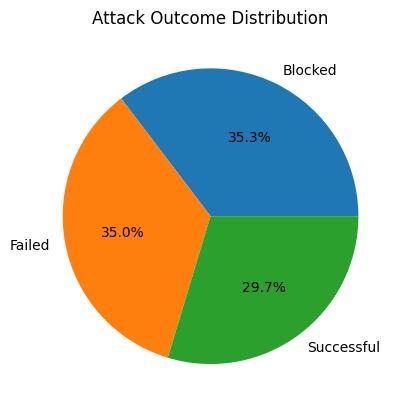

In [6]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.countplot(y="attack_type", data=df)
plt.title("Attack Type Distribution")
plt.show()

sns.countplot(x="severity", data=df)
plt.title("Severity Distribution")
plt.show()

sns.countplot(y="device_affected", data=df)
plt.title("Devices Affected")
plt.show()

sns.countplot(y="source_country", data=df)
plt.title("Attacks by Source Country")
plt.show()

df['status'].value_counts().plot(kind='pie', autopct='%1.1f%%')
plt.title("Attack Outcome Distribution")
plt.ylabel("")
plt.show()


## Prompt – Cyber Threat Prediction

"Apply machine learning to predict cyber attack severity using historical threat data."


In [12]:
df_ml = df.copy()
df_ml['year'] = df_ml['timestamp'].dt.year
df_ml['month'] = df_ml['timestamp'].dt.month
df_ml['day'] = df_ml['timestamp'].dt.day
df_ml.drop(columns=['timestamp'], inplace=True)


In [13]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()

for col in df_ml.select_dtypes(include='object').columns:
    df_ml[col] = le.fit_transform(df_ml[col])


In [14]:
X = df_ml.drop('severity', axis=1)
y = df_ml['severity']


In [15]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

model = RandomForestClassifier(random_state=42)
model.fit(X_train, y_train)

pred = model.predict(X_test)
accuracy = accuracy_score(y_test, pred)

print("Model Accuracy:", accuracy)


Model Accuracy: 0.23333333333333334


## Conclusion

This notebook demonstrated an end-to-end cybersecurity analytics pipeline.
A synthetic dataset was generated using AI prompting, followed by exploratory analysis,
visualization, and machine learning-based severity prediction.
The results highlight how data-driven approaches can support cyber threat detection
and decision-making in real-world security systems.


## Prompting Declaration

This Python task was completed using AI-based prompting.
Prompts were used for dataset generation, analysis, visualization,
and machine learning model development.
